## Training SVM

### Step 1 | Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.svm import SVC
from tune_clf_hyperparameters import tune_clf_hyperparameters
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Tuning hyperparameters of model

In [4]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

In [5]:
grid_params = {
    'svm__C': [0.01, 0.05, 0.1, 1, 3, 5, 7, 10],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

In [6]:
# Hyperparameter tuning for SVM
best_svm, best_svm_hyperparams, tuning_results = tune_clf_hyperparameters(svm_pipeline, grid_params, X_train, y_train)

In [7]:
# Print top 10 hyperparameters selection that gives top 10 accuracy score
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,9.780334,0.692392,0.835876,0.055919,5,linear,"{'svm__C': 5, 'svm__kernel': 'linear'}",0.864238,0.863896,0.861186,0.870822,0.867811,0.865591,0.003358,1
21,12.900333,0.405460,0.804322,0.100005,10,linear,"{'svm__C': 10, 'svm__kernel': 'linear'}",0.863636,0.863595,0.861186,0.870822,0.867209,0.865290,0.003368,2
18,11.365912,0.877976,0.825035,0.050918,7,linear,"{'svm__C': 7, 'svm__kernel': 'linear'}",0.863937,0.863595,0.860885,0.870220,0.867510,0.865230,0.003265,3
12,10.614280,2.543778,0.898404,0.075252,3,linear,"{'svm__C': 3, 'svm__kernel': 'linear'}",0.863636,0.863896,0.859681,0.870521,0.867510,0.865049,0.003692,4
9,6.464540,0.260192,0.827298,0.035027,1,linear,"{'svm__C': 1, 'svm__kernel': 'linear'}",0.864539,0.862090,0.858777,0.870220,0.865703,0.864266,0.003807,5
6,6.397783,0.186142,1.048337,0.032099,0.1,linear,"{'svm__C': 0.1, 'svm__kernel': 'linear'}",0.860927,0.860283,0.855465,0.866305,0.860885,0.860773,0.003437,6
16,8.158323,0.497423,3.253651,0.202318,5,rbf,"{'svm__C': 5, 'svm__kernel': 'rbf'}",0.854305,0.861186,0.851551,0.866606,0.856369,0.858003,0.005332,7
13,9.018202,0.647946,3.715831,0.853444,3,rbf,"{'svm__C': 3, 'svm__kernel': 'rbf'}",0.855208,0.858476,0.850346,0.868413,0.854863,0.857461,0.006057,8
19,8.471563,0.831210,3.254791,0.257965,7,rbf,"{'svm__C': 7, 'svm__kernel': 'rbf'}",0.853101,0.857272,0.851551,0.866606,0.855766,0.856859,0.005267,9
22,7.552018,0.668154,2.892704,0.144520,10,rbf,"{'svm__C': 10, 'svm__kernel': 'rbf'}",0.851294,0.852153,0.852153,0.866908,0.858175,0.856137,0.005922,10


In [8]:
best_svm_hyperparams

{'svm__C': 5, 'svm__kernel': 'linear'}

In [9]:
print(classification_report(y_train, best_svm.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.8791    0.9405    0.9088      2018
           1     0.8609    0.8162    0.8380      2465
           2     0.7288    0.7152    0.7219      1942
           3     0.7196    0.7210    0.7203      2018
           4     0.8429    0.8299    0.8364      2328
           5     0.9416    0.9611    0.9512      2598
           6     0.9972    0.9975    0.9974      3237

    accuracy                         0.8679     16606
   macro avg     0.8529    0.8545    0.8534     16606
weighted avg     0.8672    0.8679    0.8673     16606



In [10]:
y_predict = best_svm.predict(X_test)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     0.8858    0.9525    0.9179       505
           1     0.8746    0.8136    0.8430       617
           2     0.7358    0.7237    0.7297       485
           3     0.7239    0.7024    0.7130       504
           4     0.8238    0.8436    0.8336       582
           5     0.9413    0.9615    0.9513       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8695      4152
   macro avg     0.8545    0.8562    0.8550      4152
weighted avg     0.8685    0.8695    0.8686      4152



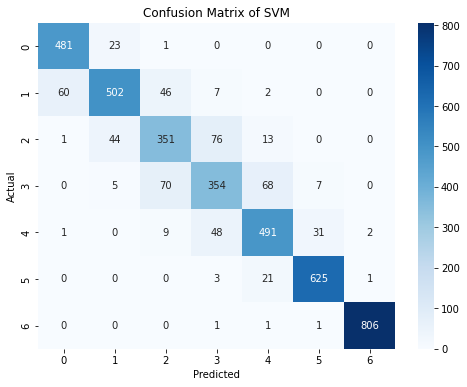

In [11]:
plot_confusion_matrix(y_test, y_predict, 'Confusion Matrix of SVM')

### Step 4 | Retrain SVM with feature selection with tuning hyperparameters  

#### Step 4.1 | Feature selection by Random Forest

In [12]:
selected_features_rf = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [13]:
X_train_select_rf = X_train[selected_features_rf]
X_test_select_rf = X_test[selected_features_rf]

In [14]:
svm_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C = 5, kernel='linear'))
])

In [15]:
svm_pipeline_2.fit(X_train_select_rf, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, kernel='linear'))])

In [16]:
print(classification_report(y_train, svm_pipeline_2.predict(X_train_select_rf), digits=4))

              precision    recall  f1-score   support

           0     0.8753    0.9356    0.9044      2018
           1     0.8586    0.7984    0.8274      2465
           2     0.6822    0.7106    0.6961      1942
           3     0.7102    0.6739    0.6916      2018
           4     0.8321    0.8325    0.8323      2328
           5     0.9400    0.9596    0.9497      2598
           6     0.9972    0.9975    0.9974      3237

    accuracy                         0.8585     16606
   macro avg     0.8422    0.8440    0.8427     16606
weighted avg     0.8580    0.8585    0.8579     16606



In [17]:
y_predict2 = svm_pipeline_2.predict(X_test_select_rf)
print(classification_report(y_test, y_predict2, digits=4))

              precision    recall  f1-score   support

           0     0.8829    0.9406    0.9108       505
           1     0.8734    0.7942    0.8319       617
           2     0.7028    0.7216    0.7121       485
           3     0.7241    0.6925    0.7079       504
           4     0.8206    0.8488    0.8345       582
           5     0.9441    0.9615    0.9527       650
           6     0.9951    0.9951    0.9951       809

    accuracy                         0.8642      4152
   macro avg     0.8490    0.8506    0.8493      4152
weighted avg     0.8639    0.8642    0.8635      4152



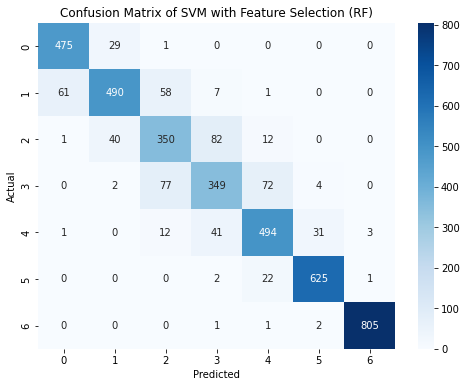

In [18]:
plot_confusion_matrix(y_test, y_predict2, 'Confusion Matrix of SVM with Feature Selection (RF)')

#### Step 4.2 | Feature selection by Decision Tree

In [19]:
selected_features_dt = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'CALC']

In [20]:
X_train_select_dt = X_train[selected_features_dt]
X_test_select_dt = X_test[selected_features_dt]

In [21]:
svm_pipeline_2.fit(X_train_select_dt, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, kernel='linear'))])

In [22]:
print(classification_report(y_train, svm_pipeline_2.predict(X_train_select_dt), digits=4))

              precision    recall  f1-score   support

           0     0.8747    0.9371    0.9048      2018
           1     0.8573    0.8041    0.8298      2465
           2     0.6819    0.7075    0.6945      1942
           3     0.6998    0.6596    0.6791      2018
           4     0.8323    0.8290    0.8306      2328
           5     0.9394    0.9604    0.9498      2598
           6     0.9966    0.9975    0.9971      3237

    accuracy                         0.8570     16606
   macro avg     0.8403    0.8422    0.8408     16606
weighted avg     0.8562    0.8570    0.8563     16606



In [23]:
y_predict3 = svm_pipeline_2.predict(X_test_select_dt)
print(classification_report(y_test, y_predict3, digits=4))

              precision    recall  f1-score   support

           0     0.8817    0.9446    0.9120       505
           1     0.8722    0.8071    0.8384       617
           2     0.6952    0.7196    0.7072       485
           3     0.7202    0.6587    0.6881       504
           4     0.8195    0.8505    0.8347       582
           5     0.9427    0.9615    0.9520       650
           6     0.9951    0.9963    0.9957       809

    accuracy                         0.8627      4152
   macro avg     0.8466    0.8483    0.8469      4152
weighted avg     0.8618    0.8627    0.8617      4152



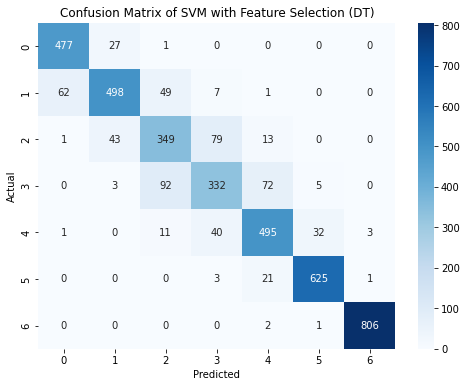

In [24]:
plot_confusion_matrix(y_test, y_predict3, 'Confusion Matrix of SVM with Feature Selection (DT)')